<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集说明" data-toc-modified-id="数据集说明-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集说明</a></span></li><li><span><a href="#背景" data-toc-modified-id="背景-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>背景</a></span></li><li><span><a href="#数据读取" data-toc-modified-id="数据读取-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据读取</a></span></li><li><span><a href="#训练集/测试集划分" data-toc-modified-id="训练集/测试集划分-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>训练集/测试集划分</a></span></li><li><span><a href="#训练集数据分析" data-toc-modified-id="训练集数据分析-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>训练集数据分析</a></span><ul class="toc-item"><li><span><a href="#用户流失率的性别分布" data-toc-modified-id="用户流失率的性别分布-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>用户流失率的性别分布</a></span></li><li><span><a href="#网络服务分布" data-toc-modified-id="网络服务分布-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>网络服务分布</a></span></li><li><span><a href="#合同类型分布" data-toc-modified-id="合同类型分布-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>合同类型分布</a></span></li><li><span><a href="#连续特征离散化" data-toc-modified-id="连续特征离散化-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>连续特征离散化</a></span></li><li><span><a href="#将连续值分箱" data-toc-modified-id="将连续值分箱-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>将连续值分箱</a></span></li></ul></li><li><span><a href="#对全数据进行处理并划分训练集" data-toc-modified-id="对全数据进行处理并划分训练集-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>对全数据进行处理并划分训练集</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#决策树可视化" data-toc-modified-id="决策树可视化-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>决策树可视化</a></span></li></ul></div>

# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.style.available
style='tableau-colorblind10'
sns.set_style('whitegrid')

## 数据集说明

| 属性 | 描述 |
| :- | :- |
| customerID       |  客户ID |
| gender           |  客户性别 |
| SeniorCitizen    |  客户是否是老年人(1, 0) |
| Partner          |  客户是否有合作伙伴(是、否) |
| Dependents       |  客户是否有家属(是、否) |
| tenure           |  客户在公司停留的月数(入网时长) |
| PhoneService     |  客户是否有电话服务(是、否) |
| MultipleLines    |  客户是否有多条线路(是、否、没有电话服务) |
| InternetService  |  客户的互联网服务提供商(DSL、光纤、否) |
| OnlineSecurity   |  客户是否具有在线安全性(是、否、没有互联网服务) |
| OnlineBackup     |  客户是否有在线备份(是、否、没有互联网服务) |
| DeviceProtection |  客户是否有设备保护(是、否、没有互联网服务) |
| TechSupport      |  客户是否有技术支持(是、否、没有互联网服务) |
| StreamingTV      |  客户是否有流媒体电视(是、否、没有互联网服务) |
| StreamingMovies  |  客户是否有流媒体电影(是、否、没有互联网服务) |
| Contract         |  客户的合同期限(每月、一年、两年) |
| PaperlessBilling |  客户是否有无纸化账单(是、否) |
| PaymentMethod    |  客户的付款方式(电子支票、邮寄支票、银行转账(自动)、信用卡(自动)) |
| MonthlyCharges   |  每月向客户收取的金额 |
| TotalCharges     |  向客户收取的总金额 |
| Churn            |  客户是否流失 |

## 背景



已知用户的用户个人信息（gender、SeniorCitizen、Partner、Dependents）、

用户账户信息数据（tenure 、Contract 、PaperlessBilling、PaymentMethod、MonthlyCharges 、 TotalCharges）、
     
用户订阅服务数据（PhoneService、MultipleLines、InternetService 、OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport、StreamingTV 、StreamingMovies）

来预测用户是否流失（Churn）

## 数据读取

In [2]:
df=pd.read_csv('./week_7/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 训练集/测试集划分

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop(['Churn'],axis=1)
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [6]:
y=df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5282, 20), (5282,), (1761, 20), (1761,))

In [8]:
def churn_trans(x):
    if x=='Yes':
        return 1
    else:
        return 0

In [9]:
y_train=y_train.apply(churn_trans)
y_train

6607    1
2598    0
2345    0
4093    0
693     1
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5282, dtype: int64

In [10]:
y_test=y_test.apply(churn_trans)
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5845    1
2301    0
5121    0
677     1
6062    0
Name: Churn, Length: 1761, dtype: int64

## 训练集数据分析

### 用户流失率的性别分布

In [11]:
train_df=X_train
train_df['churn_int']=np.array(y_train)
train_df

<ipython-input-11-721d89e986c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['churn_int']=np.array(y_train)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int
6607,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,1
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,0
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,0
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,1
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,0
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1


In [12]:
train_df.shape

(5282, 21)

In [13]:
# 1表示流失，0表示未流失，所以churn_int的平均数即表示流失率
gender_df=train_df.groupby('gender',as_index=False)['churn_int'].agg('mean')
gender_df.columns=['gender','churn_rate']
gender_df

,gender,churn_rate
0,Female,0.268587
1,Male,0.258017


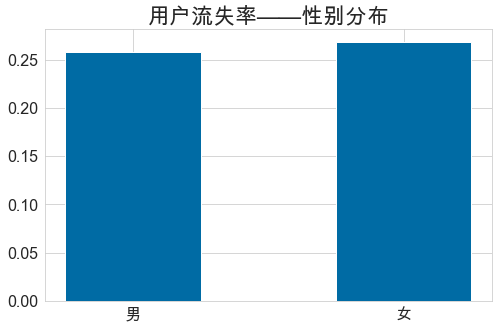

In [14]:
x=['男','女']
y=[gender_df['churn_rate'][1],gender_df['churn_rate'][0]]

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,5))
plt.style.use(style)

plt.bar(x,y,width=0.5)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('用户流失率——性别分布',size=22);

### 网络服务分布

In [15]:
internet_df = train_df.groupby('InternetService', as_index=False)['churn_int'].agg('mean')
internet_df.columns=['InternetService','churn_rate']
internet_df

,InternetService,churn_rate
0,DSL,0.191104
1,Fiber optic,0.412884
2,No,0.075784


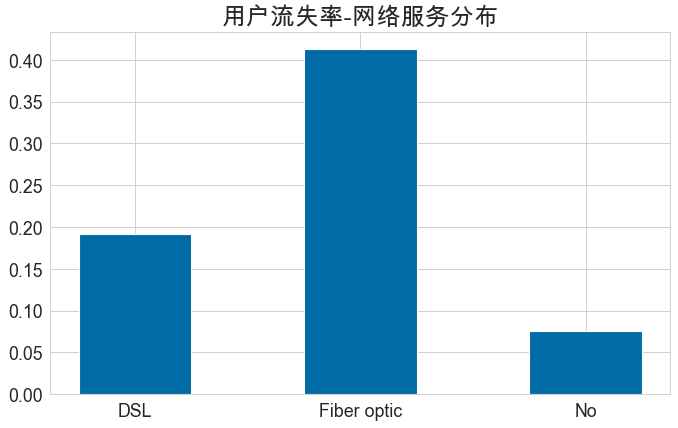

In [16]:
x = ['DSL', 'Fiber optic', 'No']
y = [internet_df['churn_rate'][0], internet_df['churn_rate'][1], internet_df['churn_rate'][2]]

plt.figure(figsize=(10,6),dpi=80)
plt.style.use(style)
plt.title("用户流失率-网络服务分布", size=22)

plt.xticks(size=16) 
plt.yticks(size=16) 

plt.bar(x, y, width=0.5);

### 合同类型分布

In [17]:
contract_df = train_df.groupby('Contract', as_index=False)['churn_int'].agg('mean')
contract_df.columns=['Contract','churn_rate']
contract_df

,Contract,churn_rate
0,Month-to-month,0.423436
1,One year,0.117229
2,Two year,0.026128


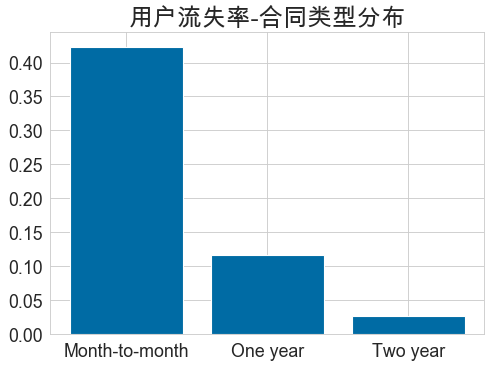

In [18]:
x = ['Month-to-month', 'One year', 'Two year']
y = [contract_df['churn_rate'][0], contract_df['churn_rate'][1], contract_df['churn_rate'][2]]

plt.figure(figsize=(7,5),dpi=80)
plt.style.use(style)
plt.title("用户流失率-合同类型分布", size=22)

plt.xticks(size=16)
plt.yticks(size=16)

plt.bar(x, y,width=0.8);

### 连续特征离散化

In [19]:
train_df['TotalCharges']=pd.to_numeric(train_df['TotalCharges'],errors='coerce')
train_df

<ipython-input-19-ebb47564c191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['TotalCharges']=pd.to_numeric(train_df['TotalCharges'],errors='coerce')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int
6607,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30,1
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00,0
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50,0
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1


In [20]:
unconverted=train_df[pd.isnull(train_df['TotalCharges'])]
unconverted

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0


In [21]:
# tenure是客户的入网时长，为0表示他们是新客户

unconverted[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
3826,3213-VVOLG,0,25.35,NaN
5218,2923-ARZLG,0,19.70,NaN
3331,7644-OMVMY,0,19.85,NaN
936,5709-LVOEQ,0,80.85,NaN
753,3115-CZMZD,0,20.25,NaN
4380,2520-SGTTA,0,20.00,NaN
488,4472-LVYGI,0,52.55,NaN
1082,4367-NUYAO,0,25.75,NaN


In [38]:
# tenure为0的新用户即使流失也要吧当月费用结清
# 即将这些用户的入网时长改为1个月，费用使用用当月消费额填充

train_df['TotalCharges'].fillna(value=train_df['MonthlyCharges'],inplace=True)
train_df

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int
6607,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30,1
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00,0
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50,0
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1


In [39]:
unconverted=train_df[pd.isnull(train_df['TotalCharges'])]
unconverted

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int


In [41]:
# 将tenure为0的数据改为1
train_df.loc[:,'tenure'].replace(to_replace=0,value=1,inplace=True)
train_df[train_df['tenure']==0]

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int


In [45]:
train_df[pd.isnull(train_df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int


### 将连续值分箱

In [46]:
pd.qcut(train_df['tenure'],5).unique()

[(0.999, 6.0], (6.0, 20.0], (20.0, 40.0], (40.0, 60.0], (60.0, 72.0]]
Categories (5, interval[float64]): [(0.999, 6.0] < (6.0, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 72.0]]

In [47]:
def tenure_cate_func(x):
    if x<=6:
        return 0
    elif x<=20:
        return 1
    elif x<=40:
        return 2
    elif x<=60:
        return 3
    else:
        return 4

In [48]:
train_df['tenure_cate']=train_df['tenure'].apply(tenure_cate_func)
train_df

<ipython-input-48-3e98bb11c1dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tenure_cate']=train_df['tenure'].apply(tenure_cate_func)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int,tenure_cate
6607,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30,1,0
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00,0,1
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50,0,0
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0,2
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1,0
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,2
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,1
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1,1


In [49]:
pd.qcut(train_df['MonthlyCharges'], 5).unique()

[(25.06, 58.42], (58.42, 79.23], (18.249, 25.06], (94.3, 118.6], (79.23, 94.3]]
Categories (5, interval[float64]): [(18.249, 25.06] < (25.06, 58.42] < (58.42, 79.23] < (79.23, 94.3] < (94.3, 118.6]]

In [50]:
def month_cate_func(x):
    if x <= 25.06:
        return 0
    elif x <= 58.42:
        return 1
    elif x <= 79.23:
        return 2
    elif x <= 94.3:
        return 3
    else:
        return 4

In [51]:
pd.qcut(train_df['TotalCharges'], 5).unique()

[(18.799, 272.03], (272.03, 937.3], (2075.67, 4508.35], (4508.35, 8684.8], (937.3, 2075.67]]
Categories (5, interval[float64]): [(18.799, 272.03] < (272.03, 937.3] < (937.3, 2075.67] < (2075.67, 4508.35] < (4508.35, 8684.8]]

In [52]:
def total_cate_func(x):
    if x <= 272.03:
        return 0
    elif x <= 937.3:
        return 1
    elif x <= 2075.67:
        return 2
    elif x <= 4508.35:
        return 3
    else:
        return 4

In [53]:
train_df['month_cate'] = train_df['MonthlyCharges'].apply(month_cate_func)
train_df['total_cate'] = train_df['TotalCharges'].apply(total_cate_func)
train_df

<ipython-input-53-54ecfdf53eac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['month_cate'] = train_df['MonthlyCharges'].apply(month_cate_func)
<ipython-input-53-54ecfdf53eac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['total_cate'] = train_df['TotalCharges'].apply(total_cate_func)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_int,tenure_cate,month_cate,total_cate
6607,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,25.30,25.30,1,0,1,0
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,75.15,525.00,0,1,2,1
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50,0,0,0,0
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0,2,2,3
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1,0,4,0
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,2,3,3
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,1,0,1
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1,1,4,2


## 对全数据进行处理并划分训练集

In [63]:
df2=df.copy()

df2['TotalCharges']=pd.to_numeric(df2['TotalCharges'],errors='coerce')
df2['TotalCharges'].fillna(value=df2['MonthlyCharges'],inplace=True)
df2.loc[:,'tenure'].replace(to_replace=0,value=1,inplace=True)

df2['tenure_cate']=df2['tenure'].apply(tenure_cate_func)
df2['month_cate']=df2['MonthlyCharges'].apply(month_cate_func)
df2['total_cate']=df2['TotalCharges'].apply(total_cate_func)
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cate,month_cate,total_cate
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2,1,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,1,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2,3,2
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4,4,4
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,1,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0,2,1


In [64]:
# 把字符型转化为数字
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df2['gender'] = le.fit_transform(df['gender'])
df2['Partner'] = le.fit_transform(df['Partner'])
df2['Dependents'] = le.fit_transform(df['Dependents'])
df2['PhoneService'] = le.fit_transform(df['PhoneService'])
df2['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df2['InternetService'] = le.fit_transform(df['InternetService'])
df2['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df2['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df2['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df2['TechSupport'] = le.fit_transform(df['TechSupport'])
df2['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df2['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df2['Contract'] = le.fit_transform(df['Contract'])
df2['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df2['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df2['Churn'] = le.fit_transform(df['Churn'])

df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cate,month_cate,total_cate
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,1,2,29.85,29.85,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,1,0,3,56.95,1889.50,0,2,1,2
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,1,3,53.85,108.15,1,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,1,0,0,42.30,1840.75,0,3,1,2
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,1,2,70.70,151.65,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,1,1,3,84.80,1990.50,0,2,3,2
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,1,1,1,103.20,7362.90,0,4,4,4
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,1,2,29.60,346.45,0,1,1,1
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,1,3,74.40,306.60,1,0,2,1


In [67]:
# 划分训练集,去掉分箱前的原始列和无作用的用户id
X=df2.drop(['customerID','tenure','MonthlyCharges','TotalCharges','Churn'],axis=1)
y=df2['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5282, 19), (5282,), (1761, 19), (1761,))

In [68]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_cate,month_cate,total_cate
6607,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0
2598,0,0,0,0,1,0,1,0,0,2,0,0,0,0,1,2,1,2,1
2345,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,0,0,0,0
4093,0,0,0,0,1,2,1,0,0,0,0,0,0,0,1,1,2,2,3
693,0,0,0,0,1,2,1,0,0,0,0,0,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,0,4,0
5191,0,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,2,3,3
5226,1,0,1,1,1,0,2,1,1,1,1,1,1,0,1,2,1,0,1
5390,1,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1,4,2


In [69]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5845    1
2301    0
5121    0
677     1
6062    0
Name: Churn, Length: 1761, dtype: int64

## Modelling


In [71]:
from sklearn import tree

clf=tree.DecisionTreeClassifier()

clf.fit(X_train,y_train)

pred=clf.predict(X_test)

print("true:{}\npred:{}".format(y_test[:20].values, pred[:20]))

true:[1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1]
pred:[1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0]


In [72]:
# 准确率，精准率，召回率
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("准确率:{}".format(accuracy_score(y_test.values, pred)))
print("精准率:{}".format(precision_score(y_test.values, pred)))
print("召回率:{}".format(recall_score(y_test.values, pred)))

准确率:0.7314026121521863
精准率:0.5064935064935064
召回率:0.48851774530271397


## Hyperparameter tuning

In [73]:
clf_2 = tree.DecisionTreeClassifier(criterion='entropy', \
                                    max_depth=5, min_samples_split=4, class_weight="balanced")
clf_2 = clf_2.fit(X_train, y_train)

pred_2 = clf_2.predict(X_test)

In [74]:
print("准确率:{}".format(accuracy_score(y_test.values, pred_2)))
print("精准率:{}".format(precision_score(y_test.values, pred_2)))
print("召回率:{}".format(recall_score(y_test.values, pred_2)))

准确率:0.7387847813742192
精准率:0.512549537648613
召回率:0.8100208768267223


## 决策树可视化

In [80]:
#tree.export_graphviz(clf_2)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[13] <= 0.5\\nentropy = 1.0\\nsamples = 5282\\nvalue = [2641.0, 2641.0]"] ;\n1 [label="X[7] <= 0.5\\nentropy = 0.912\\nsamples = 2893\\nvalue = [1131.857, 2327.5]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[16] <= 0.5\\nentropy = 0.821\\nsamples = 1961\\nvalue = [653.464, 1896.2]"] ;\n1 -> 2 ;\n3 [label="X[6] <= 0.5\\nentropy = 0.618\\nsamples = 728\\nvalue = [166.25, 917.7]"] ;\n2 -> 3 ;\n4 [label="X[10] <= 1.0\\nentropy = 0.789\\nsamples = 308\\nvalue = [97.036, 313.5]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.745\\nsamples = 249\\nvalue = [72.607, 269.8]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.941\\nsamples = 59\\nvalue = [24.429, 43.7]"] ;\n4 -> 6 ;\n7 [label="X[15] <= 2.5\\nentropy = 0.478\\nsamples = 420\\nvalue = [69.214, 604.2]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.439\\nsamples = 357\\nvalue = [52.929, 530.1]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.68\\nsamples = 63\\nvalue = [16.286, 74.1]"] ;\n7 -> 9 ;\n